In [4]:
##Step 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load data
df = pd.read_csv("D:/ictak_dsa/Wine_clust.csv")

print(df.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

In [6]:
#Step 2: Data Preprocessing
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


C:\Users\USER\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

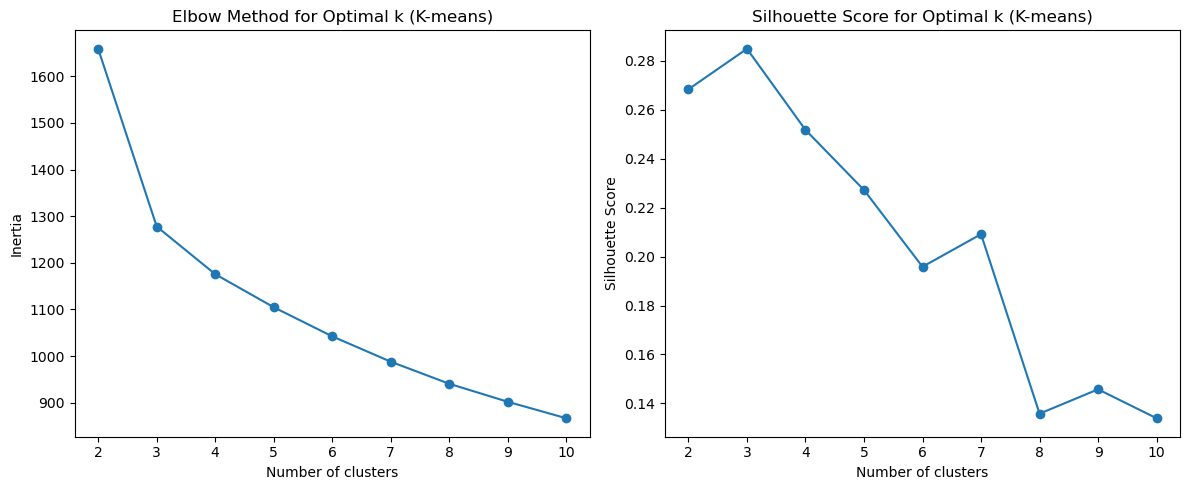

In [7]:
#Step 3: Find Optimal Number of Clusters (K-means)
# K-means clustering
inertia = []
silhouette_scores = []
possible_k_values = range(2, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(possible_k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k (K-means)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k (K-means)')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [9]:
#Step 4: K-means Clustering with Optimal Number of Clusters
# Based on the analysis, let's choose k=3
optimal_k = 3
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
df['KMeans_Cluster'] = kmeans_optimal.fit_predict(df_scaled)


C:\Users\USER\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
#Step 5: Hierarchical Agglomerative Clustering
# Hierarchical Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
df['Agg_Cluster'] = agg_clustering.fit_predict(df_scaled)


In [13]:
#Step 6: DBSCAN Clustering
# DBSCAN clustering
dbscan = DBSCAN(eps=1, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)


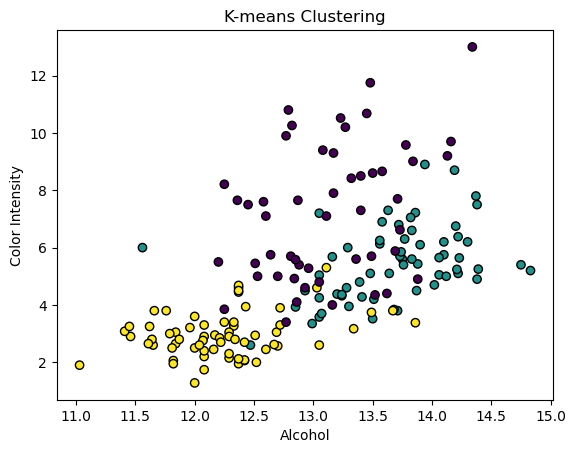

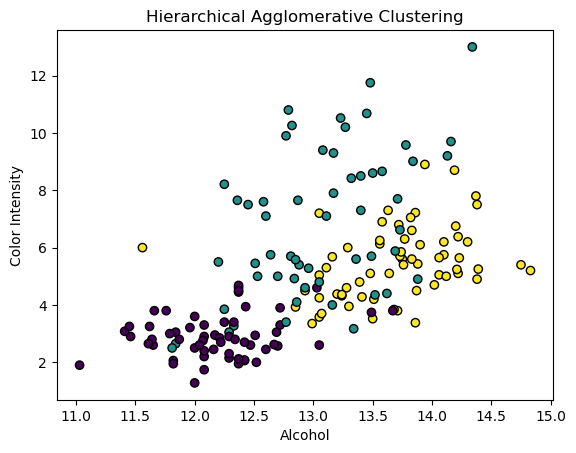

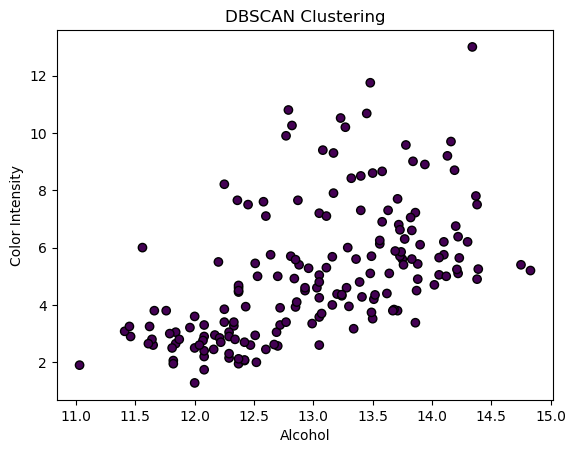

In [14]:
#Step 7: Visualize Clusters
# Visualize the clusters (choose any two features for simplicity)
plt.scatter(df['Alcohol'], df['Color_Intensity'], c=df['KMeans_Cluster'], cmap='viridis', edgecolors='k')
plt.title('K-means Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.show()

plt.scatter(df['Alcohol'], df['Color_Intensity'], c=df['Agg_Cluster'], cmap='viridis', edgecolors='k')
plt.title('Hierarchical Agglomerative Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.show()

plt.scatter(df['Alcohol'], df['Color_Intensity'], c=df['DBSCAN_Cluster'], cmap='viridis', edgecolors='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.show()
